In [9]:
%pip install matplotlib seaborn scikit-learn pandas numpy

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.3 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 2.4 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [seaborn]0/11 [seaborn]ib]n]
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

In [4]:
df = df[df['person_age'] < 100] 
df = df[df['person_emp_length'] < 100]

In [5]:
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

/var/folders/yt/2ln2k31n5n5b7y9tzzhjt_j40000gn/T/ipykernel_70933/1813270452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
/var/folders/yt/2ln2k31n5n5b7y9tzzhjt_j40000gn/T/ipykernel_70933/1813270452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [6]:
print("Kalan boş veri sayısı:", df.isnull().sum().sum())
print("Temizlenmiş Veri Boyutu:", df.shape)

Kalan boş veri sayısı: 0
Temizlenmiş Veri Boyutu: (31679, 12)


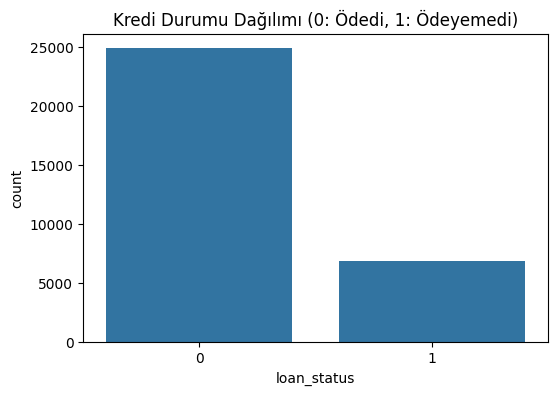

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title('Kredi Durumu Dağılımı (0: Ödedi, 1: Ödeyemedi)')
plt.show()

In [16]:
cat_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [17]:
df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

In [18]:
print("Yeni Veri Seti Boyutu:", df.shape)
display(df.head())

Yeni Veri Seti Boyutu: (31679, 23)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,True,...,False,False,True,False,False,False,False,False,False,False


In [20]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [23]:
y_pred = model.predict(X_test)

In [24]:
print("Model Doğruluk Oranı (Accuracy): {:.2f}".format(accuracy_score(y_test, y_pred)))
print("\nDetaylı Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Model Doğruluk Oranı (Accuracy): 0.88

Detaylı Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      4963
           1       0.72      0.75      0.73      1373

    accuracy                           0.88      6336
   macro avg       0.82      0.83      0.83      6336
weighted avg       0.88      0.88      0.88      6336



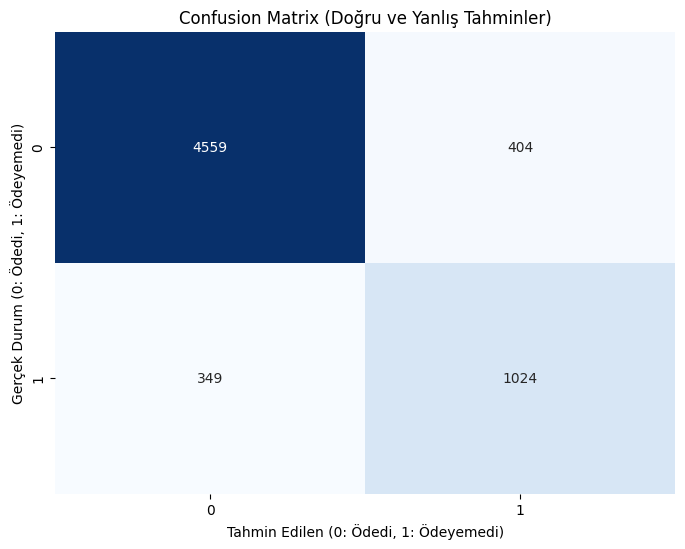

In [25]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen (0: Ödedi, 1: Ödeyemedi)')
plt.ylabel('Gerçek Durum (0: Ödedi, 1: Ödeyemedi)')
plt.title('Confusion Matrix (Doğru ve Yanlış Tahminler)')
plt.show()

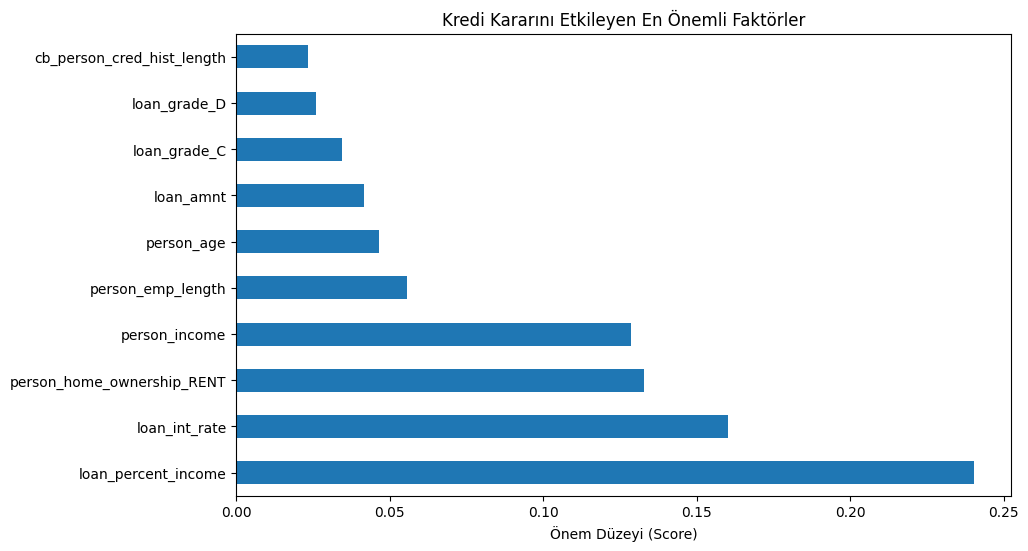

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh') # En önemli 10 özelliği göster
plt.title('Kredi Kararını Etkileyen En Önemli Faktörler')
plt.xlabel('Önem Düzeyi (Score)')
plt.show()

In [27]:
# Örnek: Yeni bir müşteri bankadan içeri girdi
yeni_musteri = X_test.iloc[0].to_frame().T # Test setinden rastgele bir kişi alalım
print("Müşteri Bilgileri:\n", yeni_musteri)

# Tahmin yap
tahmin = model.predict(yeni_musteri)
sonuc = "KREDİ VERİLİR (RİSKSİZ)" if tahmin[0] == 0 else "KREDİ REDDEDİLDİ (RİSKLİ)"

print("\n------------------------------------------------")
print("YAPAY ZEKA KARARI:", sonuc)
print("------------------------------------------------")

Müşteri Bilgileri:
       person_age person_income person_emp_length loan_amnt loan_int_rate  \
19455         30         40750               2.0      3000         15.28   

      loan_percent_income cb_person_cred_hist_length  \
19455                0.07                         10   

      person_home_ownership_OTHER person_home_ownership_OWN  \
19455                       False                     False   

      person_home_ownership_RENT  ... loan_intent_MEDICAL  \
19455                       True  ...               False   

      loan_intent_PERSONAL loan_intent_VENTURE loan_grade_B loan_grade_C  \
19455                False               False        False        False   

      loan_grade_D loan_grade_E loan_grade_F loan_grade_G  \
19455         True        False        False        False   

      cb_person_default_on_file_Y  
19455                       False  

[1 rows x 22 columns]

------------------------------------------------
YAPAY ZEKA KARARI: KREDİ REDDEDİLDİ (RİSKLİ